In [1]:
import sqlite3

In [17]:
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

In [19]:
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

In [20]:
sales_data = [
    ('Product A', 10, 20.0),
    ('Product B', 5, 50.0),
    ('Product C', 8, 30.0),
    ('Product D', 7, 20.0),
    ('Product E', 3, 50.0)
]

In [22]:
cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sales_data)
conn.commit()

print("Sample sales data inserted.")

Sample sales data inserted.


In [23]:
import pandas as pd

In [24]:
query = """
SELECT 
    product, 
    SUM(quantity) AS total_qty, 
    SUM(quantity * price) AS revenue
FROM 
    sales
GROUP BY 
    product
"""

In [25]:
df = pd.read_sql_query(query, conn)

In [26]:
print(df)

     product  total_qty  revenue
0  Product A         20    400.0
1  Product B         10    500.0
2  Product C         16    480.0
3  Product D         14    280.0
4  Product E          6    300.0


In [27]:
import matplotlib.pyplot as plt

<Axes: xlabel='product'>

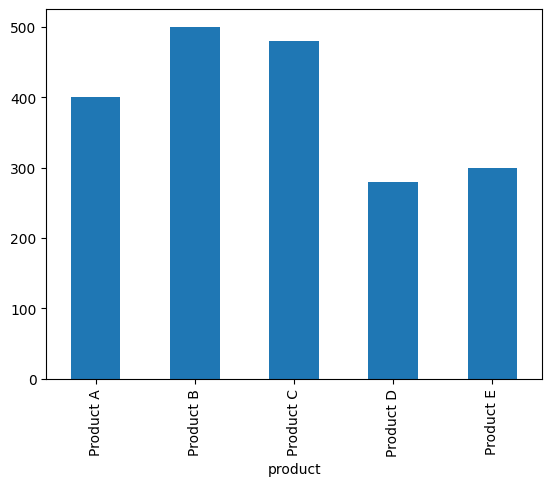

In [31]:
df.plot(kind='bar', x='product', y='revenue', legend=False)

In [32]:
plt.savefig("sales_chart.png")

<Figure size 640x480 with 0 Axes>

In [33]:
conn.close()